1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


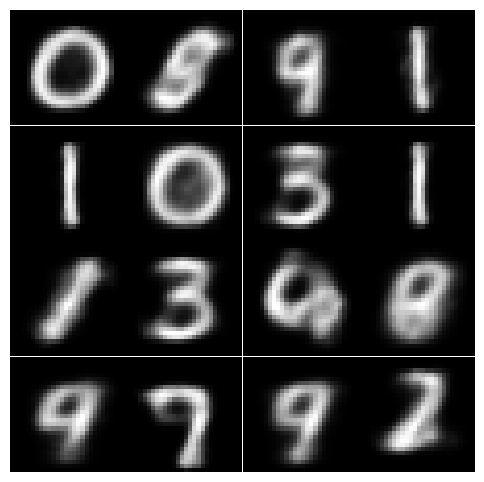

----------- EPOCH 3 -----------
 308/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - loss: 0.2057

KeyboardInterrupt: 

In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Input, Flatten, Reshape, LeakyReLU, Activation, Dropout
from tensorflow.keras.models import Model, Sequential
from matplotlib import pyplot as plt
from IPython import display # If using IPython, Colab, or Jupyter
import numpy as np

# Load MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

# Plot an example image from x_train
plt.imshow(x_train[0], cmap="gray")
plt.show()

LATENT_SIZE = 32

# Define encoder model
encoder = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(512),
    LeakyReLU(),
    Dropout(0.5),
    Dense(256),
    LeakyReLU(),
    Dropout(0.5),
    Dense(128),
    LeakyReLU(),
    Dropout(0.5),
    Dense(64),
    LeakyReLU(),
    Dropout(0.5),
    Dense(LATENT_SIZE),
    LeakyReLU()
])

# Define decoder model
decoder = Sequential([
    Dense(64, input_shape=(LATENT_SIZE,)),
    LeakyReLU(),
    Dropout(0.5),
    Dense(128),
    LeakyReLU(),
    Dropout(0.5),
    Dense(256),
    LeakyReLU(),
    Dropout(0.5),
    Dense(512),
    LeakyReLU(),
    Dropout(0.5),
    Dense(784),
    Activation("sigmoid"),
    Reshape((28, 28))
])

# Build autoencoder model
img = Input(shape=(28, 28))
latent_vector = encoder(img)
output = decoder(latent_vector)
model = Model(inputs=img, outputs=output)

# Compile the model
model.compile(optimizer="nadam", loss="binary_crossentropy")

EPOCHS = 60

# Training and visualization loop
for epoch in range(EPOCHS):
    fig, axs = plt.subplots(4, 4, figsize=(6, 6))
    rand = x_test[np.random.randint(0, 10000, 16)].reshape((16, 28, 28))
    display.clear_output(wait=True)  # If you imported display from IPython

    for i in range(4):
        for j in range(4):
            axs[i, j].imshow(model.predict(rand[i * 4 + j].reshape(1, 28, 28))[0], cmap="gray")
            axs[i, j].axis("off")

    plt.subplots_adjust(wspace=0, hspace=0)
    plt.show()

    print("-----------", "EPOCH", epoch + 1, "-----------")

    # Train the model
    model.fit(x_train, x_train, epochs=1, verbose=1)
